# 03 - Análise Exploratória - Doses

## Dose por Unidade da Federação e Ano

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
doses_por_uf_ano = pd.read_csv("../dados/dados limpos/doses_por_uf_ano.csv")
doses_por_uf_ano = doses_por_uf_ano.set_index("Unidade da Federação")
doses_por_uf_ano.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,221136,254228,511993,595405,634672,603409,567875,732052,698279,702254,...,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707
12 Acre,78576,79331,240690,245193,281863,309201,300787,378766,353552,349014,...,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891
13 Amazonas,427850,430178,1013496,1198384,1327220,1360736,1270370,1581187,1613814,1685221,...,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366
14 Roraima,51558,64159,139177,187080,162704,171102,168107,220949,210400,207007,...,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819
15 Pará,890749,914640,2585184,2886309,3182573,3209151,3183958,4313926,3928530,4003528,...,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432


Nesse dataset nós temos a quantidade de vacinas aplicadas por estado e por ano. Vamos ver como a quantidade total de doses aplicadas no Brasil se comporta ao longo dos anos.

In [3]:
doses_por_uf_ano.sum()

1997    19655709
1998    20327528
1999    61179053
2000    67270520
2001    69655072
2002    66135589
2003    63525217
2004    79342932
2005    74720359
2006    74923836
2007    75177841
2008    72922335
2009    74411131
2010    73202221
2011    44640471
2012    42720182
2013    49110580
2014    63842324
2015    63025044
2016    53191124
2017    53132232
2018    53110958
2019    33461957
dtype: int64

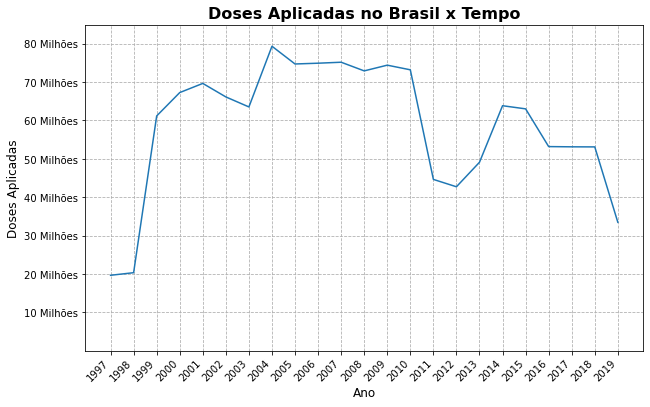

In [4]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=doses_por_uf_ano.sum())
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
plt.ylim(0, 85000000)
plt.title("Doses Aplicadas no Brasil x Tempo", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("Ano", fontdict = {"fontsize":12})
plt.xticks(rotation=45, ha="right")
plt.ylabel("Doses Aplicadas", fontdict = {"fontsize":12})
plt.grid(linestyle='--')
plt.show()

Podemos observar que a quantidade de doses aplicadas no Brasil teve um grande aumento de 1998 para 1999, saltando de 20 milhões de doses para 61 milhoes. Em 2004 tivemos o maior pico atingindo 79 milhões. Após isso tivemos uma que de 2010 para 2012.

Parte desse aumento de 1998 para 1999 pode ser explicado pela inclusão da vacina para Hepatite B, como podemos ver na matéria da [Folha de São Paulo](https://www1.folha.uol.com.br/fsp/cotidian/ff18019931.htm). A vacina da Hepatite B foi aplicada em crianças menores de 1 ano e em adultos que compõem o grupo de risco.
<br>Além da vacina para a Hepatite do tipo B, o ano de 1999 também incluiu a vacina contra o Haemophilus influenza, uma bactéria que faz com que doenças evasivas ataquem os bebês. Isso quer dizer que, por causa da bactéria, uma doença que ataque um órgão específico pode se espalhar por todo o organismo da criança.

Vamos observar como está a soma das doses dos estados.

In [5]:
doses_por_uf_ano.T.sum().sort_values(ascending = False)

Unidade da Federação
35 São Paulo              271858212
31 Minas Gerais           133030903
29 Bahia                  101622228
33 Rio de Janeiro         100897206
41 Paraná                  73075330
26 Pernambuco              66661784
43 Rio Grande do Sul       65843170
23 Ceará                   64971627
15 Pará                    62731205
21 Maranhão                55139851
52 Goiás                   43066582
42 Santa Catarina          40163451
13 Amazonas                30552895
25 Paraíba                 27204460
32 Espírito Santo          24808542
27 Alagoas                 24437055
22 Piauí                   23305357
51 Mato Grosso             23241840
24 Rio Grande do Norte     20983101
50 Mato Grosso do Sul      19408188
53 Distrito Federal        18975071
28 Sergipe                 15687705
11 Rondônia                12998328
17 Tocantins               11477825
12 Acre                     6412850
16 Amapá                    5948633
14 Roraima                  4180816
dtype: 

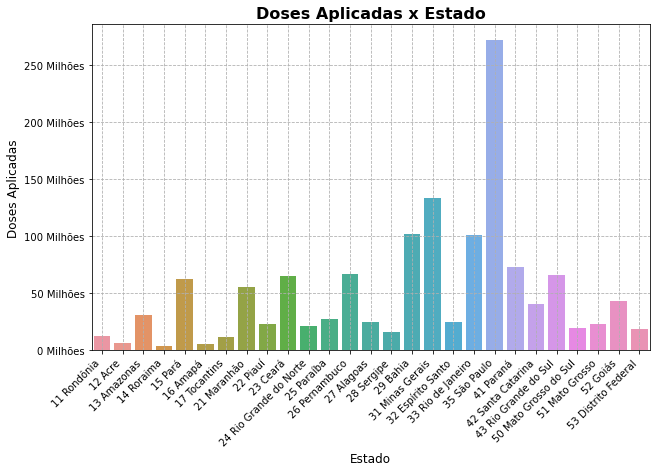

In [6]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=doses_por_uf_ano.T.sum().index, y=doses_por_uf_ano.T.sum().values)
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
plt.title("Doses Aplicadas x Estado", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("Estado", fontdict = {"fontsize":12})
plt.xticks(rotation=45, ha="right")
plt.ylabel("Doses Aplicadas", fontdict = {"fontsize":12})
plt.grid(linestyle='--')
plt.show()

Podemos ver claramente que o estado que mais aplicou doses foi o estado de São Paulo, mas nesse caso não faz sentido fazer a análise assim já que a população de São Paulo é muito maior que a maioria dos outros estados. Com isso, vamos pegar os dados de população por estado disponíveis no [Wikipédia](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o) e dividir a quantidade de doses aplicadas pela população.

In [7]:
populacao = pd.read_csv('../dados/dados limpos/populacao.csv')
populacao = populacao.set_index("Unidade da Federação")
populacao.head()

,População
Unidade da Federação,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [8]:
soma_doses_estado = doses_por_uf_ano.T.sum()
soma_doses_estado.index = soma_doses_estado.index.str[3:]
soma_doses_estado = pd.DataFrame(soma_doses_estado)
soma_doses_estado = soma_doses_estado.rename({0:"Soma"}, axis="columns")
soma_doses_estado.head()

,Soma
Unidade da Federação,
Rondônia,12998328
Acre,6412850
Amazonas,30552895
Roraima,4180816
Pará,62731205


In [9]:
soma_doses_estado_populacao = soma_doses_estado.join(populacao)
soma_doses_estado_populacao["Doses per capita"] = soma_doses_estado_populacao["Soma"]/soma_doses_estado_populacao["População"]
soma_doses_estado_populacao.sort_values(by="Doses per capita", ascending=False, inplace=True)
soma_doses_estado_populacao.head()

,Soma,População,Doses per capita
Unidade da Federação,,,
Maranhão,55139851,7114598,7.750241
Alagoas,24437055,3351543,7.291285
Amazonas,30552895,4207714,7.261162
Rondônia,12998328,1796460,7.235523
Pará,62731205,8690745,7.218162


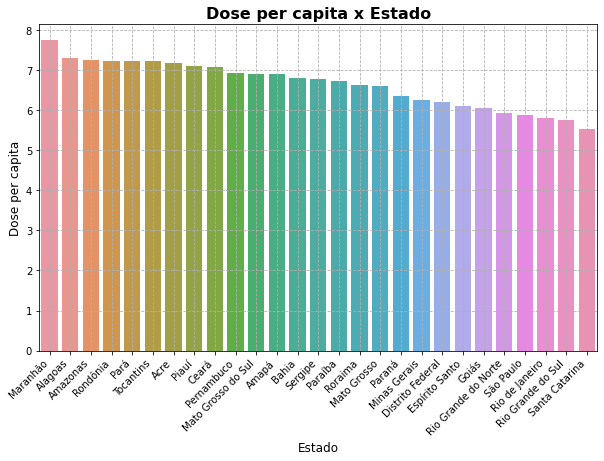

In [10]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=soma_doses_estado_populacao, x=soma_doses_estado_populacao.index, y="Doses per capita")
plt.title("Dose per capita x Estado", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("Estado", fontdict = {"fontsize":12})
plt.xticks(rotation=45, ha="right")
plt.ylabel("Dose per capita", fontdict = {"fontsize":12})
plt.grid(linestyle='--')
plt.show()

Enquanto São Paulo foi o estado que mais aplicou doses no Brasil, quando fazemos o ranking de Doses per capita ele não chegou nem na metade. No ranking de doses per capita os três primeiros foram Maranhão, Alagoas e Amazonas, respectivamente.

<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>

<div style="text-align:center;">
  <a href="./02 - Análise Exploratória - Cobertura Vacinal.ipynb">&laquo; Anterior</a>
  <a href="./04 - Análisando Hipóteses.ipynb">Próxima &raquo;</a>
</div>

  
</body>
</html> 